In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Download Data Set
https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line

In [2]:
data_df = pd.read_csv('international-airline-passengers.csv', index_col='Month')

In [3]:
data_df.head(10)

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
1949-06,135.0
1949-07,148.0
1949-08,148.0
1949-09,136.0


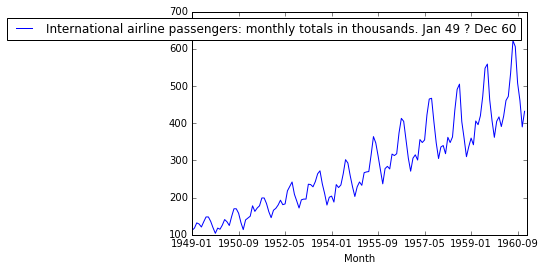

In [4]:
data_df.plot()
plt.show()

## 날짜 데이터는 제외하고, 값만 얻어오는 방법

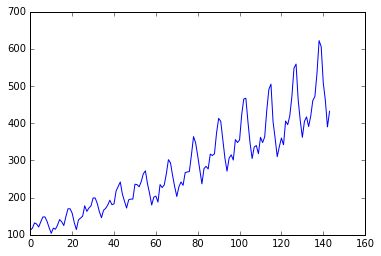

In [5]:
data_df = pd.read_csv('international-airline-passengers.csv', usecols=[1])
data_df.dropna(inplace=True)
plt.plot(data_df)
plt.show()

In [6]:
dataset = data_df.values
dataset = dataset.astype('float32')

## LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used.

### We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

## With time series data, the sequence of values is important.

### The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [8]:
# split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

96 48


## the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.

In [9]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back) , 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

## current input data shape is [samples, features]

In [11]:
trainX.shape

(94, 1)

## The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

In [12]:
# reshape input to be [samples, time_steps, features] by using reshape function
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
import keras.models as model
from keras.layers import LSTM, Dense

Using TensorFlow backend.


## The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction.

In [14]:
lstm_net = model.Sequential()
lstm_net.add(LSTM(4, input_dim=look_back))
lstm_net.add(Dense(1)) # Fully Connected
lstm_net.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
lstm_net.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, 4)             96          lstm_input_1[0][0]               
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             5           lstm_1[0][0]                     
Total params: 101
____________________________________________________________________________________________________


In [16]:
lstm_net.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=1)

Epoch 1/100
94/94 [==============================] - 2s - loss: 0.0706     
Epoch 2/100
94/94 [==============================] - 1s - loss: 0.0367     
Epoch 3/100
94/94 [==============================] - 1s - loss: 0.0245     
Epoch 4/100
94/94 [==============================] - 1s - loss: 0.0204     
Epoch 5/100
94/94 [==============================] - 1s - loss: 0.0184     
Epoch 6/100
94/94 [==============================] - 1s - loss: 0.0169     
Epoch 7/100
94/94 [==============================] - 1s - loss: 0.0158     
Epoch 8/100
94/94 [==============================] - 1s - loss: 0.0145     
Epoch 9/100
94/94 [==============================] - 1s - loss: 0.0132     
Epoch 10/100
94/94 [==============================] - 1s - loss: 0.0118     
Epoch 11/100
94/94 [==============================] - 1s - loss: 0.0105     
Epoch 12/100
94/94 [==============================] - 1s - loss: 0.0092     
Epoch 13/100
94/94 [==============================] - 1s - loss: 0.0080     
Epoch 14

## Once the model is fit, we can estimate the performance of the model on the train and test datasets. This will give us a point of comparison for new models.

In [17]:
# make predictins
trainPredict = lstm_net.predict(trainX)
testPredict = lstm_net.predict(testX)

In [18]:
trainPredict

array([[ 0.02500852],
       [ 0.03489423],
       [ 0.05857591],
       [ 0.05343226],
       [ 0.0398982 ],
       [ 0.06375524],
       [ 0.08658417],
       [ 0.08658417],
       [ 0.06548944],
       [ 0.03655778],
       [ 0.01209184],
       [ 0.03489423],
       [ 0.0299307 ],
       [ 0.04832532],
       [ 0.07421654],
       [ 0.06375524],
       [ 0.04663136],
       [ 0.0883645 ],
       [ 0.1264323 ],
       [ 0.1264323 ],
       [ 0.1045282 ],
       [ 0.06029845],
       [ 0.02828534],
       [ 0.07246375],
       [ 0.08126314],
       [ 0.09014806],
       [ 0.14122307],
       [ 0.11360972],
       [ 0.13011721],
       [ 0.14122307],
       [ 0.1805681 ],
       [ 0.1805681 ],
       [ 0.15239772],
       [ 0.111788  ],
       [ 0.08303346],
       [ 0.11909033],
       [ 0.12827365],
       [ 0.14494082],
       [ 0.16926628],
       [ 0.14680246],
       [ 0.15053093],
       [ 0.21652785],
       [ 0.23926893],
       [ 0.26194385],
       [ 0.19947299],
       [ 0

## Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data (thousands of passengers per month).

In [19]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredcit = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [20]:
trainPredict

array([[ 116.95441437],
       [ 122.07521057],
       [ 134.34231567],
       [ 131.67790222],
       [ 124.66726685],
       [ 137.02522278],
       [ 148.8506012 ],
       [ 148.8506012 ],
       [ 137.92353821],
       [ 122.9369278 ],
       [ 110.26357269],
       [ 122.07521057],
       [ 119.50410461],
       [ 129.03251648],
       [ 142.44416809],
       [ 137.02522278],
       [ 128.15504456],
       [ 149.77281189],
       [ 169.4919281 ],
       [ 169.4919281 ],
       [ 158.14561462],
       [ 135.23458862],
       [ 118.65180206],
       [ 141.53622437],
       [ 146.09431458],
       [ 150.69670105],
       [ 177.15354919],
       [ 162.849823  ],
       [ 171.40071106],
       [ 177.15354919],
       [ 197.53427124],
       [ 197.53427124],
       [ 182.9420166 ],
       [ 161.90618896],
       [ 147.01133728],
       [ 165.688797  ],
       [ 170.44573975],
       [ 179.0793457 ],
       [ 191.67993164],
       [ 180.04367065],
       [ 181.97502136],
       [ 216.161

In [27]:
from sklearn.metrics import accuracy_score, mean_squared_error
import math

In [25]:
trainY

array([[ 117.99999916,  131.99999879,  129.00000163,  120.99999632,
         135.00000368,  147.99999397,  147.99999397,  136.00000531,
         119.00000078,  103.99999952,  117.99999916,  115.00000199,
         125.99999674,  140.99999801,  135.00000368,  125.00000283,
         148.9999956 ,  169.99999891,  169.99999891,  157.99999481,
         133.00000042,  114.00000036,  139.99999638,  145.00000452,
         149.99999723,  177.9999965 ,  163.00000295,  172.00000217,
         177.9999965 ,  198.99999982,  198.99999982,  184.00000627,
         162.00000133,  146.00000615,  165.9999924 ,  171.00000054,
         179.99999976,  193.00000549,  181.00000139,  183.00000464,
         217.99999988,  230.00000398,  241.99999264,  209.00000066,
         191.00000223,  172.00000217,  194.00000712,  195.99999493,
         195.99999493,  235.99999831,  234.99999668,  229.00000235,
         242.99999427,  263.99999759,  272.00001061,  236.99999994,
         211.00000392,  179.99999976,  201.00000

In [29]:
# 일단 accuracy_score 는 클래스에 얼마나 해당하는지를 확인할때 사용하게 된다. 지금과 같이 얼마나 떨어진 정도를 확인할때는 사용하지 않는 듯 하다
# trainScore1 = accuracy_score(trainY, trainPredict[:,0])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score : %.2f RMSE' % trainScore)
testScore = math.sqrt(mean_squared_error(testY[0], testPredcit[:, 0]))
print('Test Score : %.2f RMSE' % testScore)

Train Score : 22.87 RMSE
Test Score : 56.60 RMSE


In [33]:
# train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
trainPredictPlot

array([[          nan],
       [ 116.95441437],
       [ 122.07521057],
       [ 134.34231567],
       [ 131.67790222],
       [ 124.66726685],
       [ 137.02522278],
       [ 148.8506012 ],
       [ 148.8506012 ],
       [ 137.92353821],
       [ 122.9369278 ],
       [ 110.26357269],
       [ 122.07521057],
       [ 119.50410461],
       [ 129.03251648],
       [ 142.44416809],
       [ 137.02522278],
       [ 128.15504456],
       [ 149.77281189],
       [ 169.4919281 ],
       [ 169.4919281 ],
       [ 158.14561462],
       [ 135.23458862],
       [ 118.65180206],
       [ 141.53622437],
       [ 146.09431458],
       [ 150.69670105],
       [ 177.15354919],
       [ 162.849823  ],
       [ 171.40071106],
       [ 177.15354919],
       [ 197.53427124],
       [ 197.53427124],
       [ 182.9420166 ],
       [ 161.90618896],
       [ 147.01133728],
       [ 165.688797  ],
       [ 170.44573975],
       [ 179.0793457 ],
       [ 191.67993164],
       [ 180.04367065],
       [ 181.975

In [34]:
# test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1 : len(dataset)-1, :] = testPredcit
testPredictPlot

array([[          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [          nan],
       [        

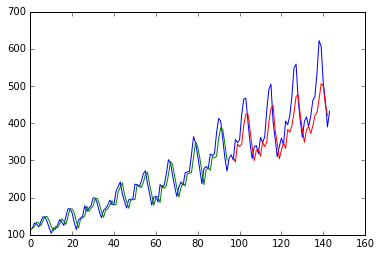

In [35]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()